Goal: Classify fetal health in order to prevent child and maternal mortality.

Data: The dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes: normal, suspect, and pathological.

Features: 
* baseline value -> Baseline Fetal Heart Rate (FHR)
* accelerations -> Number of accelerations per second 
* fetal_movement -> Number of fetal movements per second 
* uterine_contractions -> Number of uterine contractions per second 
* light_decelerations -> Number of LDs per second 
* severe_decelerations -> Number of SDs per second 
* prolongued_decelerations -> Number of PDs per second 
* abnormal_short_term_variability -> Percentage of time with abnormal short term variability 
* mean_value_of_short_term_variability -> Mean value of short term variability 
* percentage_of_time_with_abnormal_long_term_variability -> Percentage of time with abnormal long term variability
* mean_value_of_long_term_variability -> Mean value of long term variability
* histogram_width -> Width of the histogram made using all values from a record
* histogram_min -> Histogram minimum value
* histogram_max -> Histogram maximum value 
* histogram_number_of_peaks -> Number of peaks in the exam histogram
* histogram_number_of_zeroes -> Number of zeroes in the exam histogram 
* histogram_mode -> Histogram mode 
* histogram_mean -> Histogram mean 
* histogram_median -> Histogram median 
* histogram_variance -> Histogram variance 
* histogram_tendency -> Histogram trend 
* fetal_health -> Fetal health: 1 - Normal 2 - Suspect 3 - Pathological 

1. Understanding the Dataset

In [25]:
# Import Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.model_selection import GridSearchCV

In [3]:
# Load Dataset 
df = pd.read_csv("fetal_health.csv")

In [4]:
# Initial Exploration
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df.info()
# There are no missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
# Fetal Health Distribution
print("Class distribution in the target variable:")
df['fetal_health'].value_counts()

Class distribution in the target variable:


fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

The dataset is imbalanced with most the observations being 1.0.
Normal health - 1655 observations 
Suspect health - 295 observations 
Pathological - 176 observations 
This could lead to a model that is biased towards predicting the majority class (1.0). However, this could also be the true class distribution of fetal health.

2. Data Preprocessing

<Axes: >

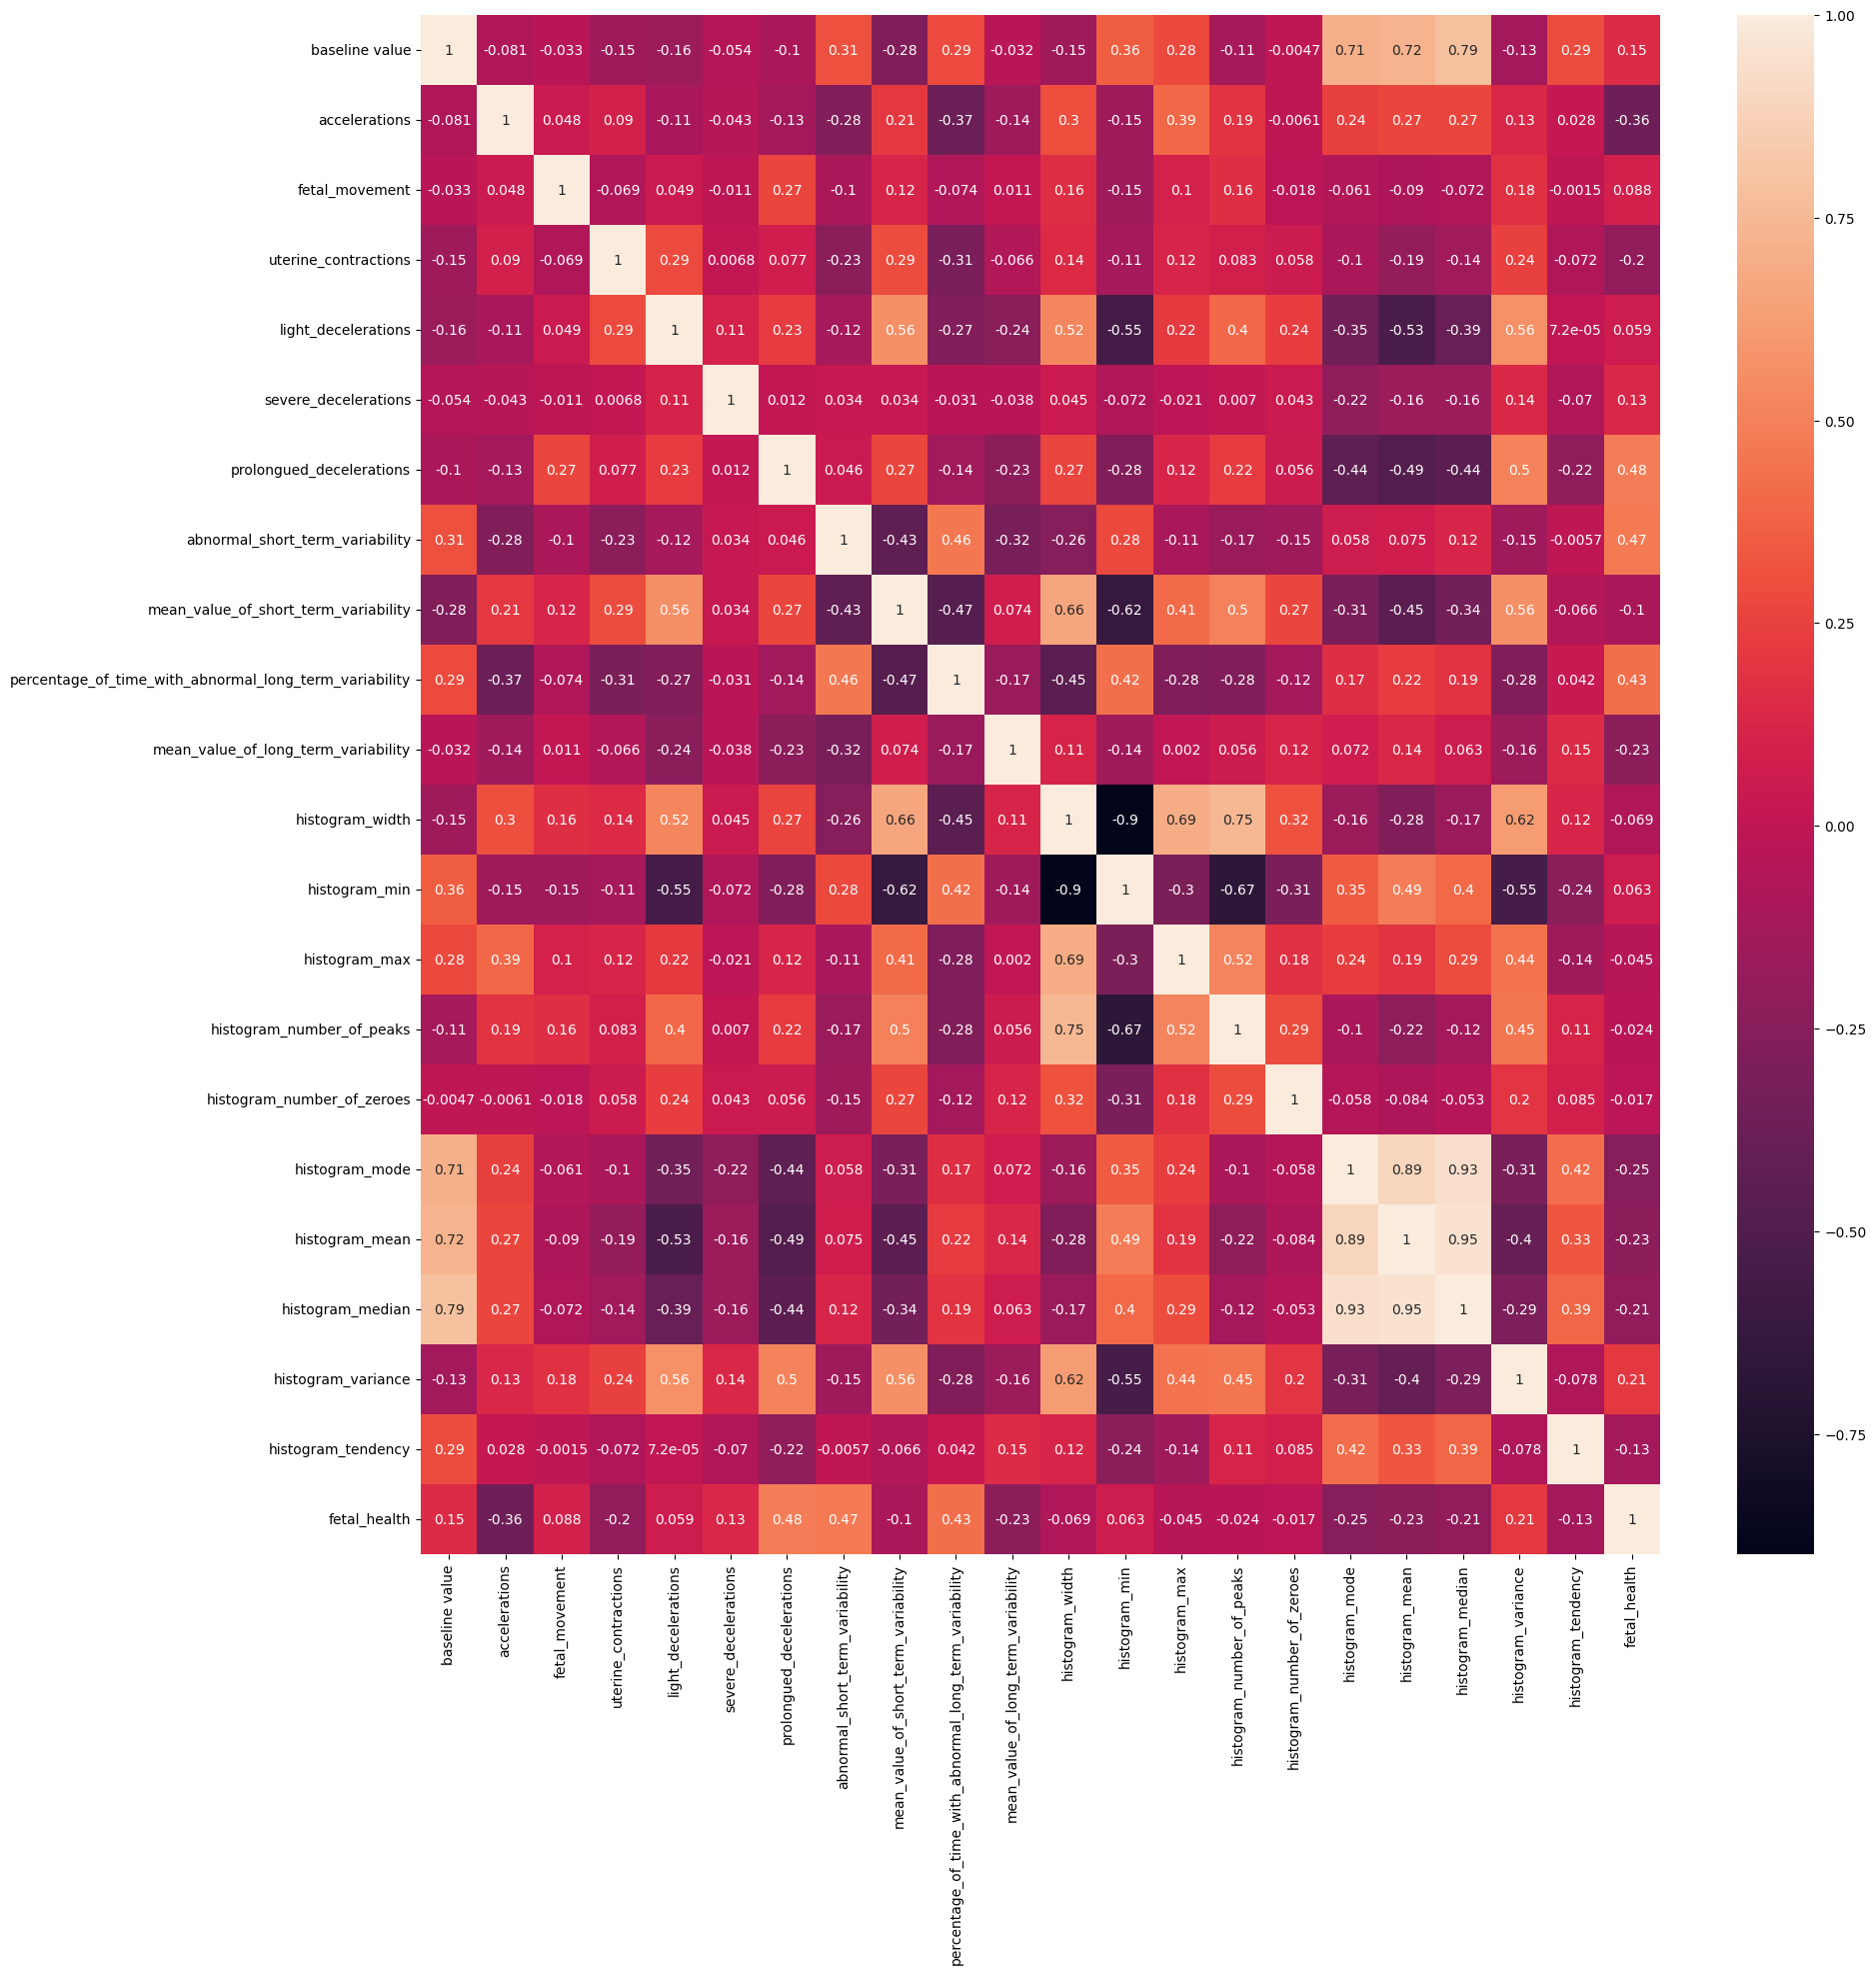

In [8]:
# Correlation Matrix 
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

The correlation matrix shows that acceleration, prolongued_decelerations, abnormal_short_term_variability, and percentage_of_time_with_abnormal_long_term_variability are the features with the higher correlation with fetal_health. 

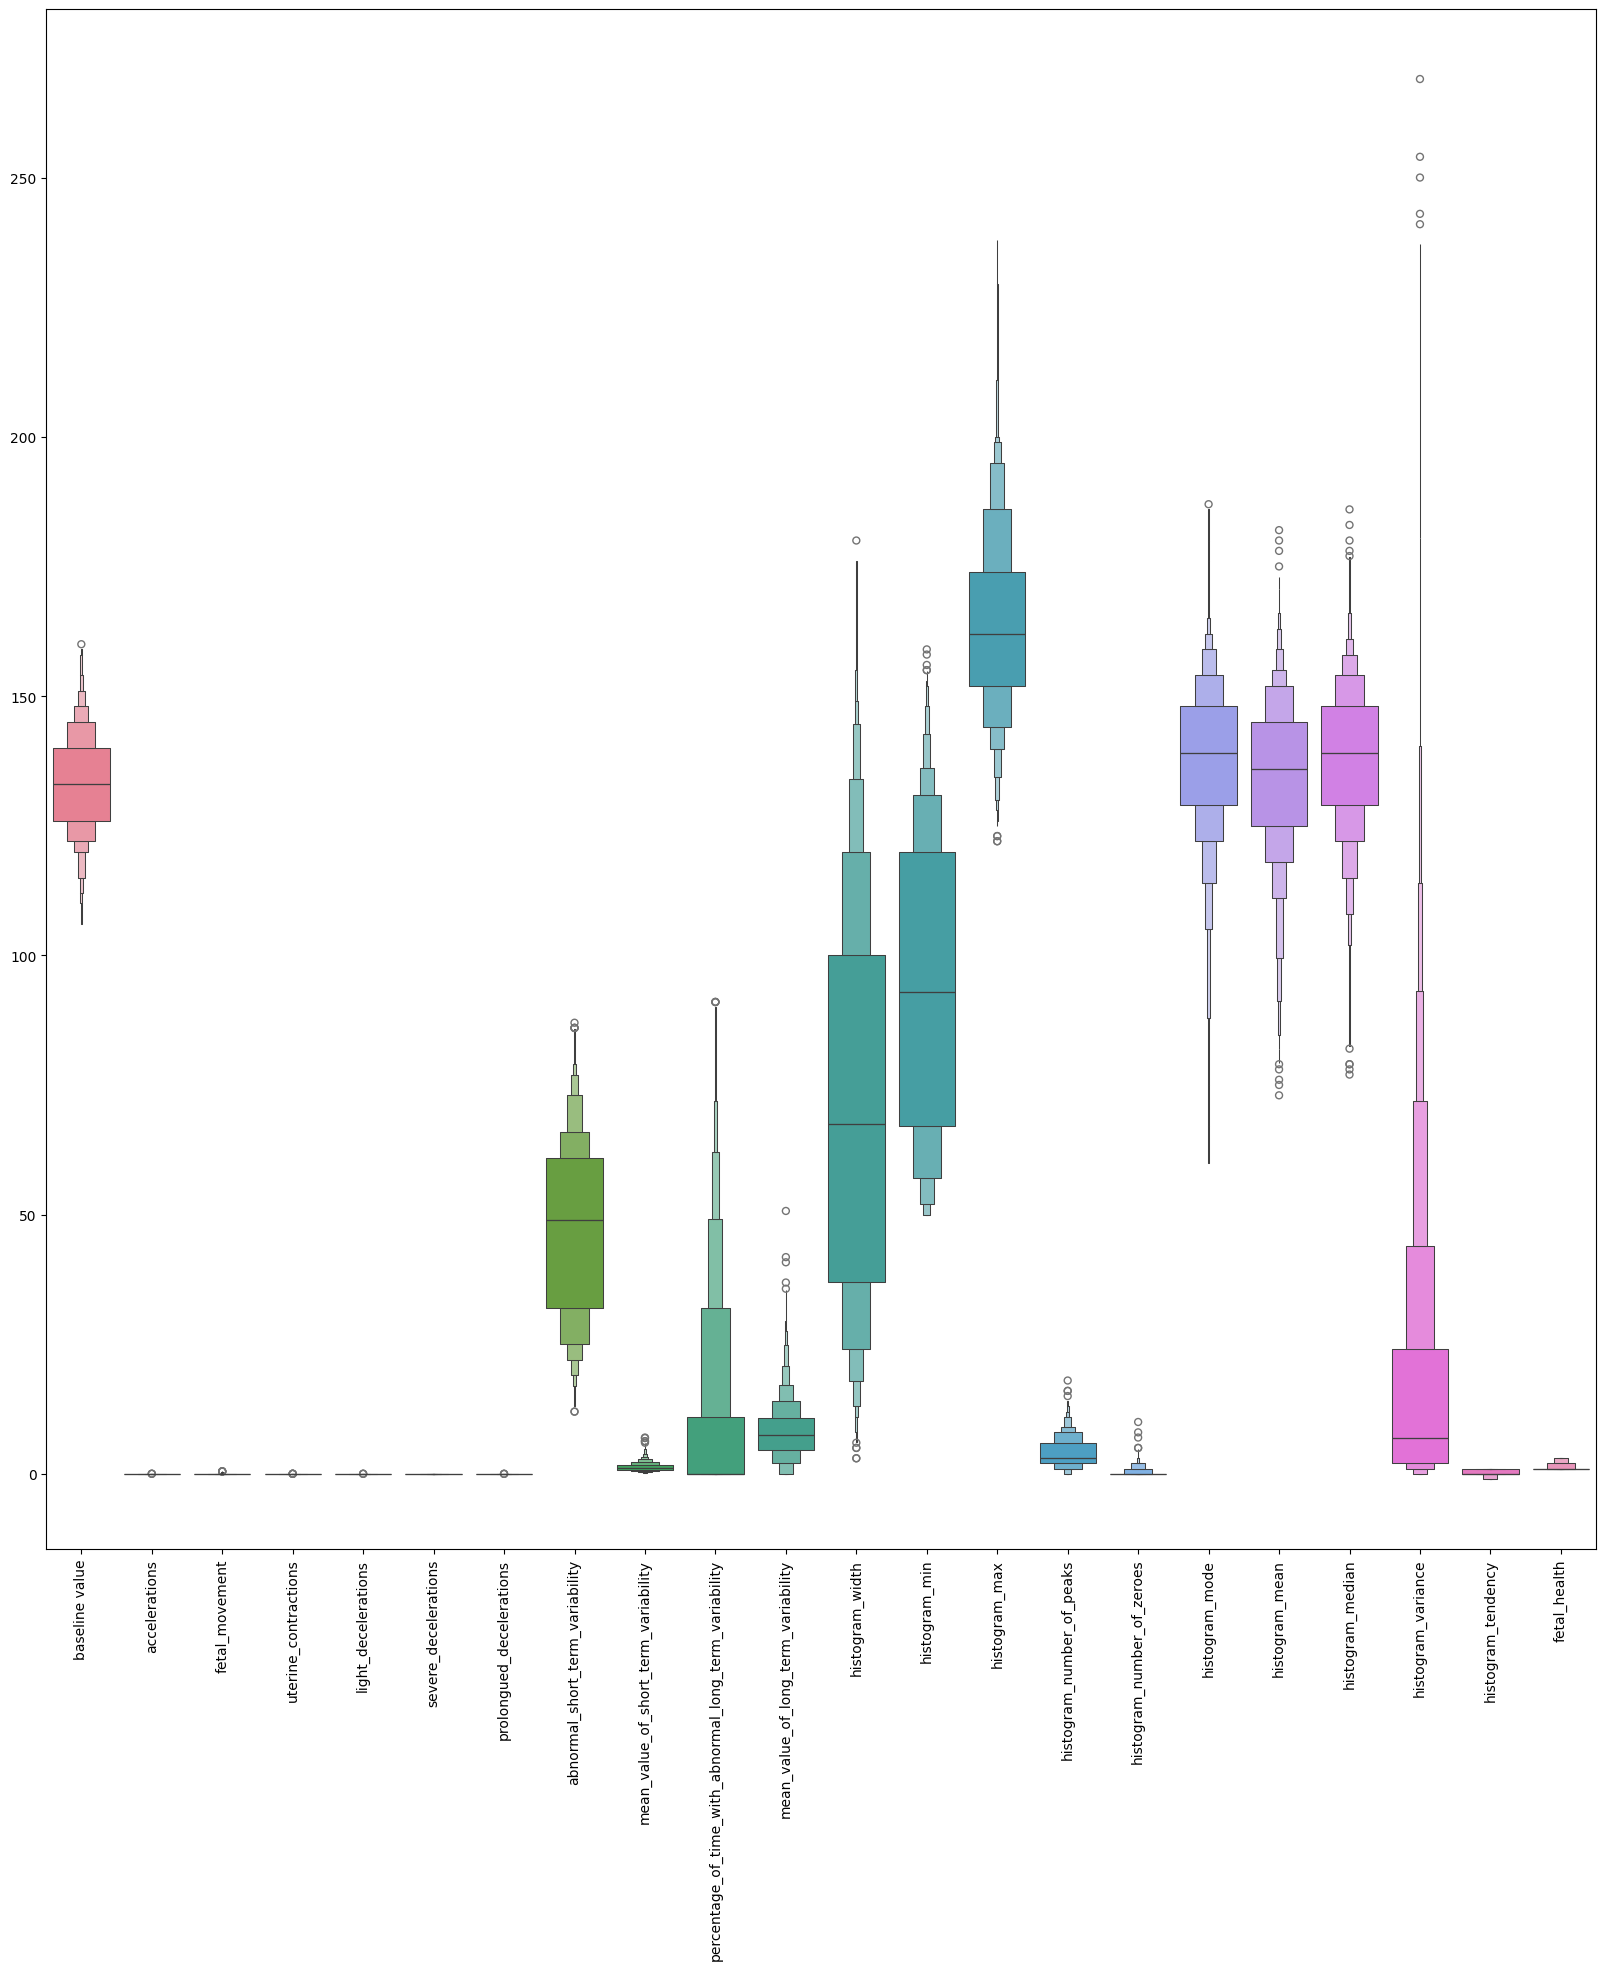

In [9]:
# Boxplots
plt.figure(figsize=(20, 20))
sns.boxenplot(data=df)
plt.xticks(rotation=90)
plt.show()

The boxplots show that there are outliers in the data. The outliers could be due to data entry errors, sampling errors, or natural variation. The outliers are probably not due to data entry errors (CTG results) and sampling errors. Therefore, they will be considered natural variation and left in the dataset. 
The features are measured on different scales. Thus, they will be standardized. 

In [10]:
# Scale Features
scaler = StandardScaler()
features = df.drop('fetal_health', axis=1)
col_names = list(features.columns)
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=col_names)

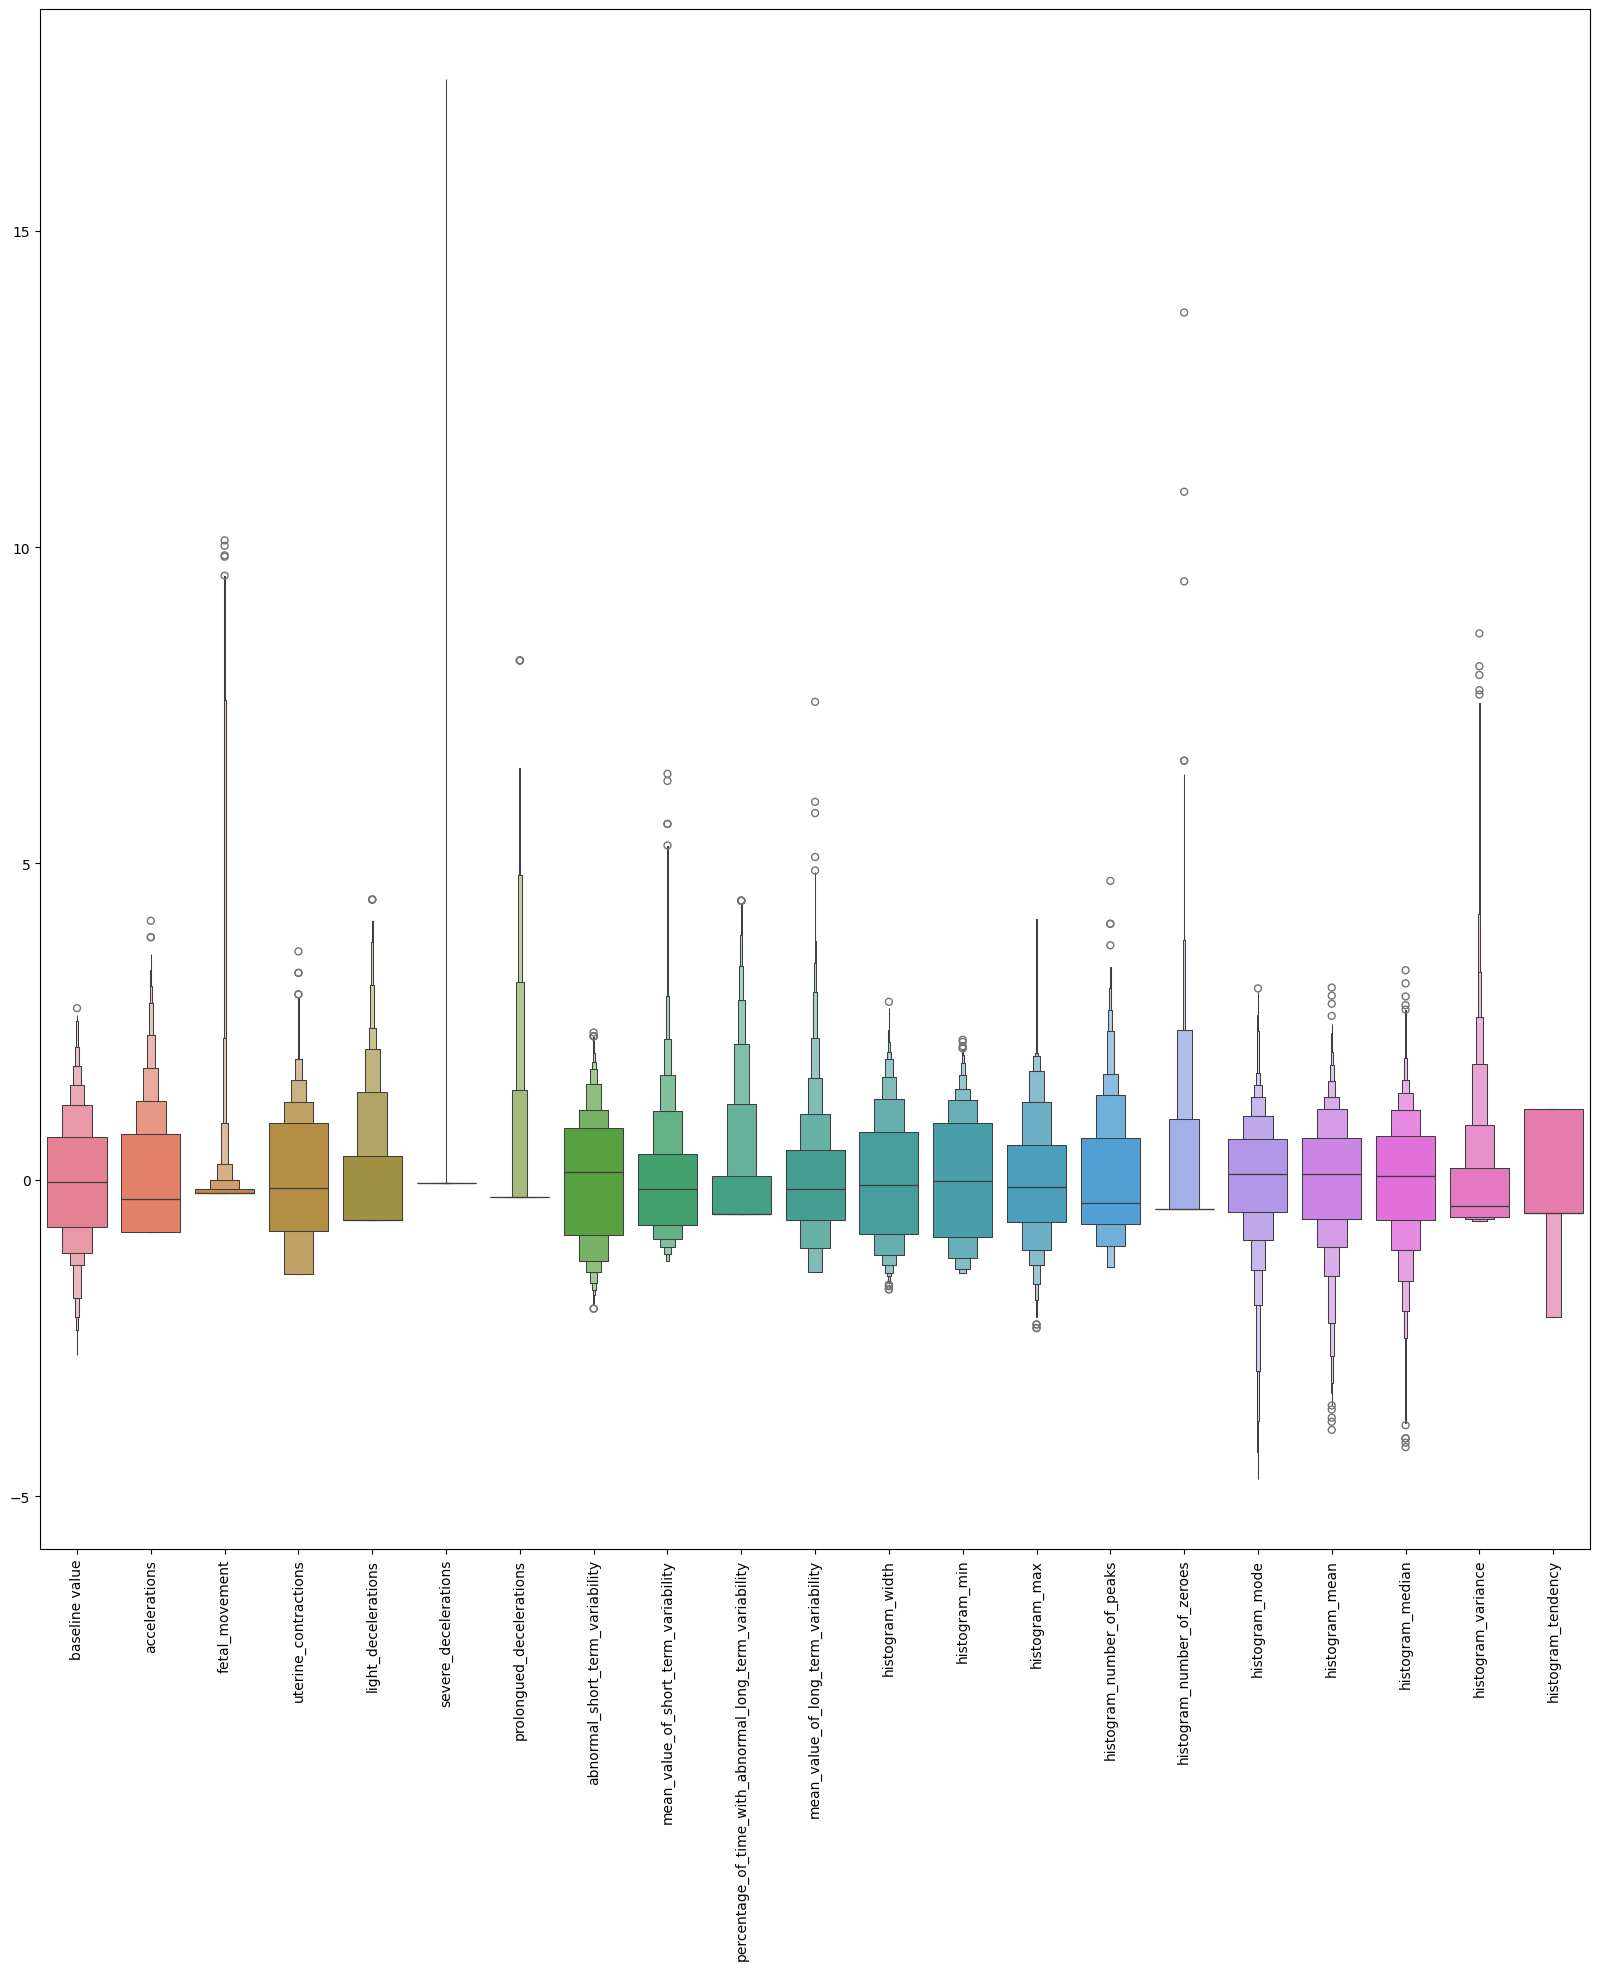

In [11]:
# Boxplots Scaled Features
plt.figure(figsize=(20,20))
sns.boxenplot(data=features_scaled)
plt.xticks(rotation=90)
plt.show()

3. Data Splitting 

In [12]:
# Data Splitting 
X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['fetal_health'], test_size=0.2, random_state=1, stratify=df['fetal_health'])

The dataset has been split into training and testing sets, with 20% of the data used for testing and 80% for training. The random state being set to 1 ensures that the split is reproducible across multiple function calls. Setting stratify to fetal health ensures that the training and test sets have approximately the same percentage of samples of each class as the original dataset. 

4. Model Selection

The dataset is small, so the plan is to employ simpler models such as Logistic Regression, Decision Tree, and Support Vector Machine (SVM). 

In [13]:
# Instantiate Logistic Regression 
logistic_regression = LogisticRegression(max_iter=1000,random_state=1)
# Instantiate SVM
svm = SVC(random_state=1)
# Instantiate Decision Tree
decision_tree = DecisionTreeClassifier(random_state=1)

In [14]:
# Train Models
logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [15]:
# Make Predictions 
logreg_pred = logistic_regression.predict(X_test)
svm_pred = svm.predict(X_test)
dectree_pred = decision_tree.predict(X_test)

5. Model Evaluation

In [16]:
# Perform CV 
logreg_score = cross_val_score(logistic_regression, X_train, y_train, cv=5)
svm_score = cross_val_score(svm, X_train, y_train, cv=5)
dectree_score = cross_val_score(decision_tree, X_train, y_train, cv=5)

print("Logistic Regression CV score: ", logreg_score.mean())
print("SVM CV score: ", svm_score.mean())
print("Decision Tree CV score: ", dectree_score.mean())

Logistic Regression CV score:  0.8858823529411766
SVM CV score:  0.9070588235294117
Decision Tree CV score:  0.9099999999999999


The Decision Tree has the best cross-validation performance.

In [17]:
# Evaluate Models on Test Data
print("Logistic Regression performance: ", accuracy_score(y_test, logreg_pred))
print("SVM performance: ", accuracy_score(y_test, svm_pred))
print("Decision Tree performance: ", accuracy_score(y_test, dectree_pred))

Logistic Regression performance:  0.9107981220657277
SVM performance:  0.931924882629108
Decision Tree performance:  0.92018779342723


The SVM performs the best on the test data. 

The Decision Tree has the slightly better cross-validation performance, and the SVM has the slightly better test accuracy. Thus, both models perform somewhat similar. 

Decision Trees are simple, fast to train, easily interpretable, and handle non-linear relationships effectively. 
SVMs are flexible, can handle non-linear relationships, and generalize well to unseen data.

In the case of classifying fetal health, we care more about performance over interpretability. Therefore, we will go with the SVM. 

6. Hyperparameter Tuning

In [20]:
# Getting best model
svm_tuning = SVC()

parameter_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(estimator=svm_tuning, param_grid=parameter_grid, cv=5, n_jobs=1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

svm_optimal = grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

7. Evaluating Final Model

In [23]:
# Testing Model on Test Data
predictions = svm_optimal.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9553990610328639


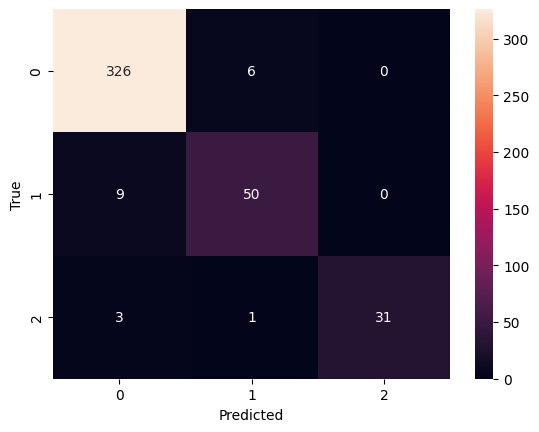

In [35]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
# Classification Report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       332
         2.0       0.88      0.85      0.86        59
         3.0       1.00      0.89      0.94        35

    accuracy                           0.96       426
   macro avg       0.95      0.91      0.92       426
weighted avg       0.96      0.96      0.95       426



Precision
When the model predicts normal health, it is correct 96% of the time. When it predicts suspect health, it is correct 88% of the time. When it predicts pathological, it is correct 100% of the time.

Recall
The model correctly identifies 98% of all normal health, 85% of all suspect health, and 89% of all pathological. 

Overall, the model performs well at identifying all classes, especially normal health vs suspect or pathological. 